In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
print("****************************************************ANALYSIS**********************************************************\n\n\t\t\t\tProject topic:-Flight Price Prediction\n\n\t(1)Took Data set from kaggle\n\n\t(2)I will be doing Exeploratary Data Analysis using Numpy,pandas,matplotlib and seaborn.\n\n\t(3)Will be making prediction models using number of machine learning regression algorithms.")

****************************************************ANALYSIS**********************************************************

				Project topic:-Flight Price Prediction

	(1)Took Data set from kaggle

	(2)I will be doing Exeploratary Data Analysis using Numpy,pandas,matplotlib and seaborn.

	(3)Will be making prediction models using number of machine learning regression algorithms.


In [5]:
print("*******************************************Data set description****************************************************\n\n\tThe objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers\n\n\n\tDataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.")

*******************************************Data set description****************************************************

	The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers


	Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.


In [6]:
df=pd.read_csv("Clean_Dataset.csv")

In [7]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


FEATURES

The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

# Exploratry Data Analysis

In [8]:
print("\t\t\t\t(1)Data set has 300153 rows and 12 columns with no null values\n\n\t\t\t\t(2)There are 8 categorical columns and 4 numerical columns\n\n")
df.info()

				(1)Data set has 300153 rows and 12 columns with no null values

				(2)There are 8 categorical columns and 4 numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [9]:
#Deleting columns that are not important for analysis.

In [10]:
df.drop(["Unnamed: 0","flight"],axis=1,inplace=True)

In [11]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


# Univariate Analysis

In [12]:
cat_cols=df.select_dtypes(include="O")
cat_cols.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class'],
      dtype='object')

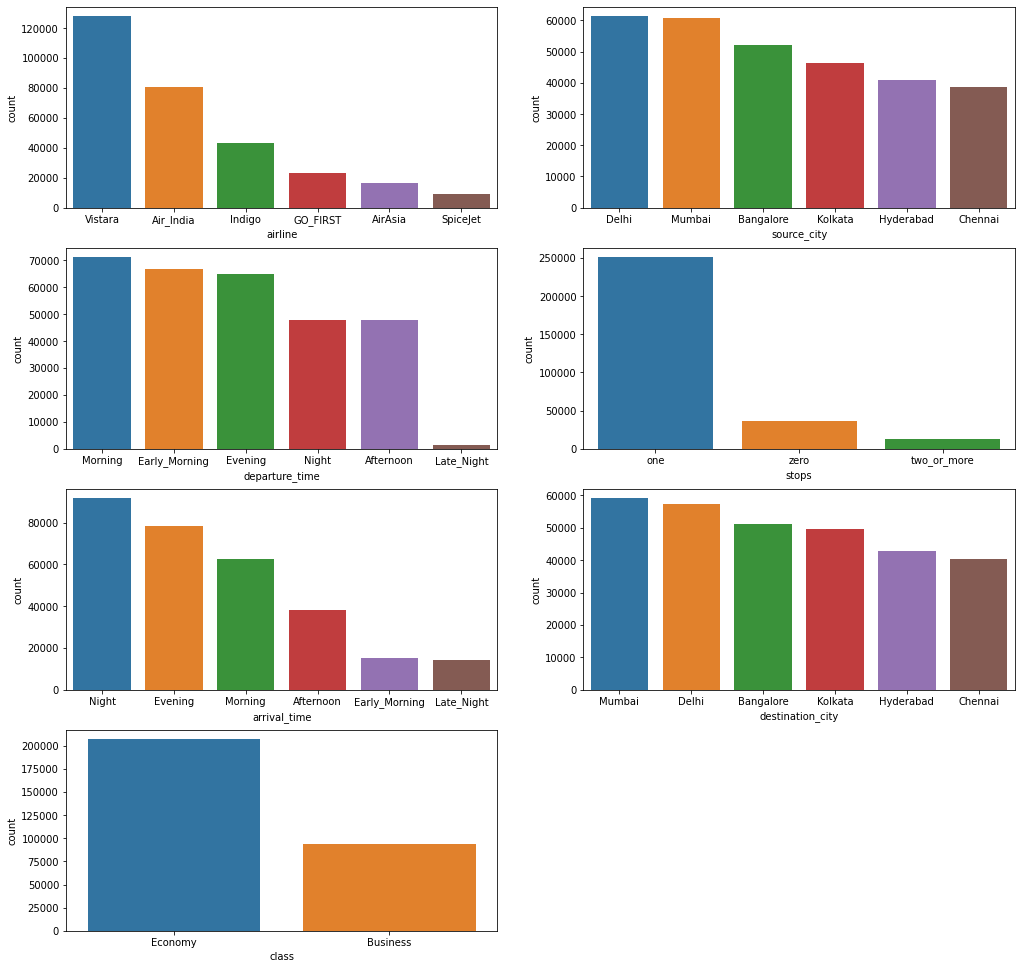

In [13]:
plt.figure(figsize=(17,17))
count=1
for i in cat_cols:
    plt.subplot(4,2,count)
    sns.countplot(df[i],order=df[i].value_counts().index)
    count+=1
plt.show()

In [14]:
print("*************************************************ANALYSIS*****************************************************\n\n\n\t(1)Most number of people prefer Vistara Airlines followed by Air_india and very less people travel by spicejet\n\n\t(2)Maximum number of people travel from Mumbai and Delhi to differnt locations.\n\n\t(3)Higly preferred time of departure is Morning,Early morning and Evening ,least preferred is late nigh boarding\n\n\t(4)Maximum flights have only 1 stop between source and destination city\n\n\t(5)Max flights have arrival time of night and least is of Late night\n\n\t(6)Maximum people have travelled to Mumbai and Delhi\n\n\t(7)Most preferred class is economy class")

*************************************************ANALYSIS*****************************************************


	(1)Most number of people prefer Vistara Airlines followed by Air_india and very less people travel by spicejet

	(2)Maximum number of people travel from Mumbai and Delhi to differnt locations.

	(3)Higly preferred time of departure is Morning,Early morning and Evening ,least preferred is late nigh boarding

	(4)Maximum flights have only 1 stop between source and destination city

	(5)Max flights have arrival time of night and least is of Late night

	(6)Maximum people have travelled to Mumbai and Delhi

	(7)Most preferred class is economy class


In [15]:
num_cols=df.select_dtypes(include=["int","float"])

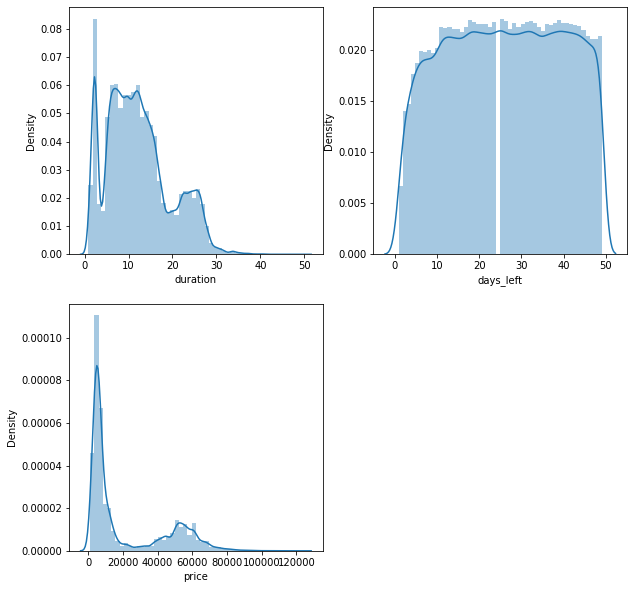

In [16]:
plt.figure(figsize=(10,10))
count=1
for i in num_cols:
    plt.subplot(2,2,count)
    sns.distplot(df[i])
    count+=1
plt.show()

In [17]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [18]:
print("*************************************************ANALYSIS*****************************************************\n\n\t(1)Min duration of flight is 0.83 hours and max duration of flight is 49 hours.\n\n\t(2)Days left column is Normally distributed with mean=median=26\n\n\t(3)Price columns is Right Skeweed with mean>median")

*************************************************ANALYSIS*****************************************************

	(1)Min duration of flight is 0.83 hours and max duration of flight is 49 hours.

	(2)Days left column is Normally distributed with mean=median=26

	(3)Price columns is Right Skeweed with mean>median


# BIVARIATE ANALYSIS.

*************************************************ANALYSIS*****************************************************

	(1)Vistara airlines have costliest tickets followed by Air_India.

	(2)Almost All cities in my dataset are costing equal fare price.

	(3)Highest fare is for night departure of flights and least is for late night.

	(4)One stop flights cost very high.

	(5)Destination cities donot have much impact on ticket fare.

	(6)Business class tickets are costlier than economy class.


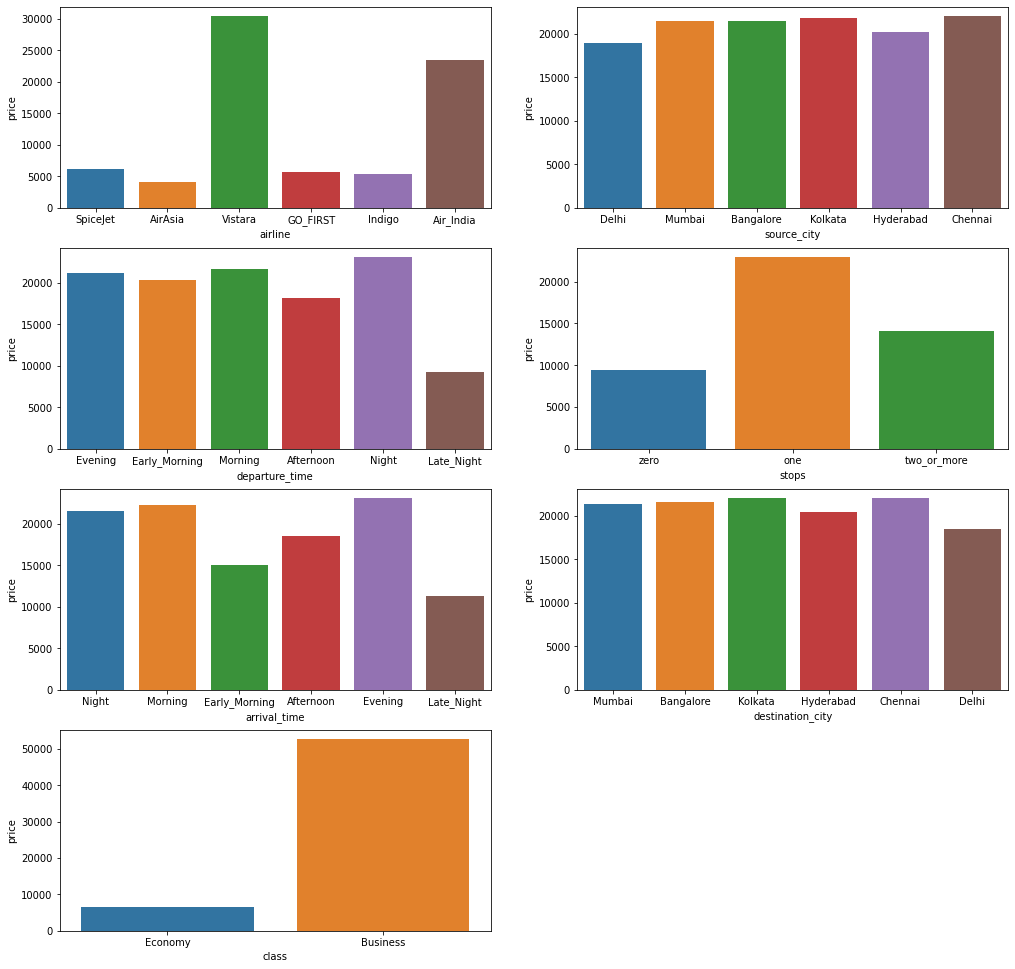

In [19]:
print("*************************************************ANALYSIS*****************************************************\n\n\t(1)Vistara airlines have costliest tickets followed by Air_India.\n\n\t(2)Almost All cities in my dataset are costing equal fare price.\n\n\t(3)Highest fare is for night departure of flights and least is for late night.\n\n\t(4)One stop flights cost very high.\n\n\t(5)Destination cities donot have much impact on ticket fare.\n\n\t(6)Business class tickets are costlier than economy class.")
plt.figure(figsize=(17,17))
count=1
for i in cat_cols:
    plt.subplot(4,2,count)
    sns.barplot(x=df[i],y=df["price"],ci=False)
    count+=1
plt.show()

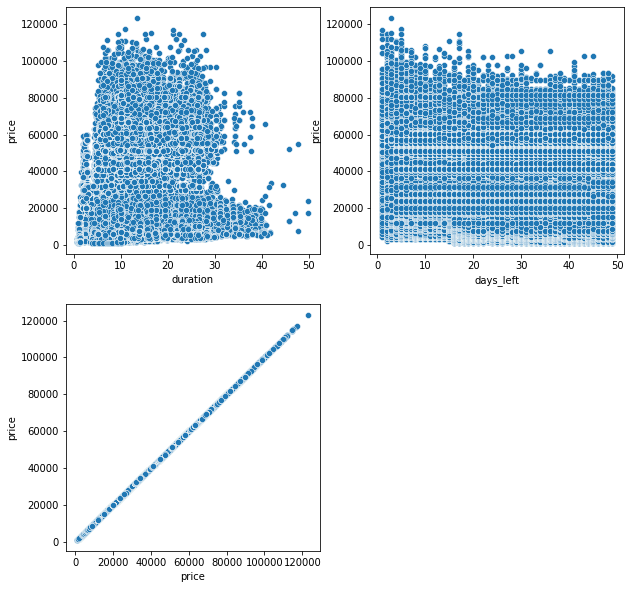

In [20]:
plt.figure(figsize=(10,10))
count=1
for i in num_cols:
    plt.subplot(2,2,count)
    sns.scatterplot(x=df[i],y=df["price"])
    count+=1
plt.show()

# Q1)Does price vary with Airlines?

In [21]:
df.groupby("airline")["price"].mean().sort_values(ascending=False)

airline
Vistara      30396.536302
Air_India    23507.019112
SpiceJet      6179.278881
GO_FIRST      5652.007595
Indigo        5324.216303
AirAsia       4091.072742
Name: price, dtype: float64

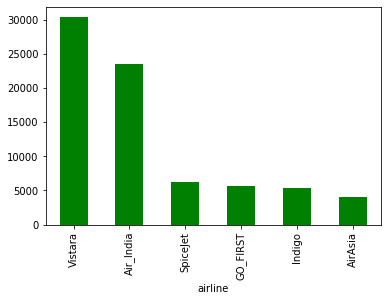

In [22]:
df.groupby("airline")["price"].mean().sort_values(ascending=False).plot(kind="bar",color="g")
plt.show()

In [23]:
df.groupby("airline")["price"].max().sort_values(ascending=False)

airline
Vistara      123071
Air_India     90970
SpiceJet      34158
GO_FIRST      32803
Indigo        31952
AirAsia       31917
Name: price, dtype: int64

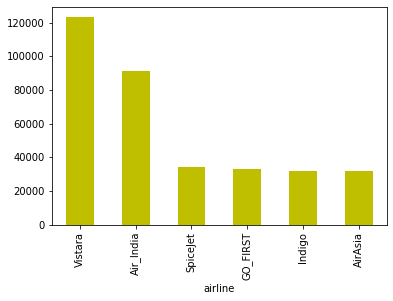

In [24]:
df.groupby("airline")["price"].max().sort_values(ascending=False).plot(kind="bar",color="y")
plt.show()

In [25]:
df.groupby("airline")["price"].median().sort_values(ascending=False)

airline
Vistara      15543.0
Air_India    11520.0
SpiceJet      5654.0
GO_FIRST      5336.0
Indigo        4453.0
AirAsia       3276.0
Name: price, dtype: float64

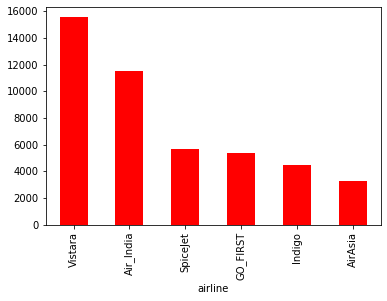

In [26]:
df.groupby("airline")["price"].median().sort_values(ascending=False).plot(kind="bar",color="r")
plt.show()

In [27]:
print("Air lines has impact on flight price\n\nVistara airlines has costliest ticket followed by Airindia rest all have almost same cost for highest ticket.\n\nHere mean is misleading because of outliers median shows that average cost of ticket for vistara is around 15k which is pocket friendly.")

Air lines has impact on flight price

Vistara airlines has costliest ticket followed by Airindia rest all have almost same cost for highest ticket.

Here mean is misleading because of outliers median shows that average cost of ticket for vistara is around 15k which is pocket friendly.


# How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [28]:
df["days_left"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

In [29]:
df1=df[(df["price"])&(df["days_left"]<3)].sort_values(by="price",ascending=False)

In [30]:
df1.groupby("airline")["price"].mean().sort_values(ascending=False)

airline
Vistara      39093.937182
Air_India    29542.800224
GO_FIRST     15673.372549
SpiceJet     12625.446602
Indigo       12290.087719
AirAsia       9831.534483
Name: price, dtype: float64

In [31]:
df1.groupby("airline")["price"].median().sort_values(ascending=False)

airline
Vistara      21843.0
Air_India    19279.0
GO_FIRST     14579.0
SpiceJet     12123.0
Indigo       11735.0
AirAsia       8393.0
Name: price, dtype: float64

In [32]:
df1.groupby("airline")["class"].count().sort_values(ascending=False)

airline
Vistara      1178
Air_India     891
Indigo        513
AirAsia       116
SpiceJet      103
GO_FIRST      102
Name: class, dtype: int64

In [33]:
A=df.groupby("airline")["price"].median().sort_values(ascending=False)

In [34]:
B=df1.groupby("airline")["price"].median().sort_values(ascending=False)

In [35]:
d={"median_price_full_data":A,"Median_cost_2days_prior":B}

In [36]:
df2=pd.DataFrame(d)

In [37]:
df2["% increase in median flight Price"]=((df2["Median_cost_2days_prior"]-df2["median_price_full_data"])/df2["median_price_full_data"])*100

# %Hike in fare price of flight 2days prior to departure day.

In [38]:
df2.sort_values(by="% increase in median flight Price",ascending=False)

,median_price_full_data,Median_cost_2days_prior,% increase in median flight Price
airline,,,
GO_FIRST,5336.0,14579.0,173.219640
Indigo,4453.0,11735.0,163.530204
AirAsia,3276.0,8393.0,156.196581
SpiceJet,5654.0,12123.0,114.414574
Air_India,11520.0,19279.0,67.352431
Vistara,15543.0,21843.0,40.532716


In [39]:
print("\n\tHere we can clearly see that every airline hikes there ticket prices as departure date comes near\n\n\tGO_FIRST has highest hike which is 173% more from normal days\n\n\tLeast hike is by Vistara which is 40% but Vistara already has high cost of prices")


	Here we can clearly see that every airline hikes there ticket prices as departure date comes near

	GO_FIRST has highest hike which is 173% more from normal days

	Least hike is by Vistara which is 40% but Vistara already has high cost of prices


# Does ticket price change based on the departure time and arrival time?

In [40]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [41]:
df.groupby("departure_time")["price"].median().sort_values(ascending=False)

departure_time
Morning          8112.0
Night            7813.0
Evening          7425.0
Early_Morning    7212.0
Afternoon        6663.0
Late_Night       4499.0
Name: price, dtype: float64

In [42]:
df.groupby("arrival_time")["price"].median().sort_values(ascending=False)

arrival_time
Evening          8854.0
Morning          7687.0
Night            7584.0
Afternoon        6714.0
Early_Morning    5800.0
Late_Night       4867.0
Name: price, dtype: float64

In [43]:
print("\n(1)Fare of flights has impact of arrival and departure time\n\n(2)For departure Morning tickets are costly and Late night are cheapest\n\n(3)For Arrival timings of evening tickes are costliest and cheapest for arrival time of night")


(1)Fare of flights has impact of arrival and departure time

(2)For departure Morning tickets are costly and Late night are cheapest

(3)For Arrival timings of evening tickes are costliest and cheapest for arrival time of night


# How the price changes with source_city and destination_city

In [44]:
df.groupby("source_city")["price"].median().sort_values(ascending=False)

source_city
Kolkata      7958.0
Chennai      7846.0
Bangalore    7488.0
Mumbai       7413.0
Hyderabad    6855.0
Delhi        6840.0
Name: price, dtype: float64

In [45]:
df.groupby("destination_city")["price"].median().sort_values(ascending=False)

destination_city
Chennai      7900.0
Kolkata      7767.0
Hyderabad    7548.0
Mumbai       7496.0
Bangalore    7425.0
Delhi        6521.0
Name: price, dtype: float64

In [46]:
print("(1)Kolkata is the costliest city to take a flight from, followed by chennai ,bangalore and mumbai\n\n(2)Flights to Chennai are costliest followed by kolkata\n\n(3)Flights to and from Delhi are cheapest")

(1)Kolkata is the costliest city to take a flight from, followed by chennai ,bangalore and mumbai

(2)Flights to Chennai are costliest followed by kolkata

(3)Flights to and from Delhi are cheapest


# Q)How does the ticket price vary between Economy and Business class?

In [47]:
df.groupby("class")["price"].max()

class
Business    123071
Economy      42349
Name: price, dtype: int64

In [48]:
df.groupby("class")["price"].mean()

class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

In [49]:
print("\n\tThere is huge impact of class on fare price of flight\n\n\tBuisness class has 699% higher rates than economy class")


	There is huge impact of class on fare price of flight

	Buisness class has 699% higher rates than economy class


# Q)Find out which airline charge what for Different Classes

In [50]:
df.groupby(["airline","class"])["price"].median()

airline    class   
AirAsia    Economy      3276.0
Air_India  Business    49613.0
           Economy      6082.0
GO_FIRST   Economy      5336.0
Indigo     Economy      4453.0
SpiceJet   Economy      5654.0
Vistara    Business    56588.0
           Economy      6461.0
Name: price, dtype: float64

In [51]:
print("(1)It can be seen that only 2 airlines provide Business class Air_India and Vistara\n\n(2)Vistara charges highest amongst both Classes")

(1)It can be seen that only 2 airlines provide Business class Air_India and Vistara

(2)Vistara charges highest amongst both Classes


# Q)How number of stops impact Fare price of flight

In [52]:
df.groupby("stops")["price"].median().sort_values(ascending=False)

stops
two_or_more    8307.0
one            7959.0
zero           4499.0
Name: price, dtype: float64

In [53]:
print("\n\t(1) Flights with 2 or more stops are costly and flights with zero stops have cheapest fare price")


	(1) Flights with 2 or more stops are costly and flights with zero stops have cheapest fare price


# Q)Find all details of Flight with highest Ticket price

In [54]:
df[df["price"]==max(df["price"])]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,Vistara,Kolkata,Morning,one,Night,Delhi,Business,13.5,3,123071


In [55]:
print("\nIt was a flight of vistara airlines booked just 3 days prior to boaring time , which took off from kolkata and went to delhi it costed 123071 ruppes for the Business class")


It was a flight of vistara airlines booked just 3 days prior to boaring time , which took off from kolkata and went to delhi it costed 123071 ruppes for the Business class


In [56]:
df.head(2)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


# Q)Find Bussiest source and destinatioin cities

In [57]:
df.groupby("source_city")["stops"].count().sort_values(ascending=False)

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: stops, dtype: int64

In [58]:
df.groupby("destination_city")["stops"].count().sort_values(ascending=False)

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: stops, dtype: int64

In [59]:
print("********************************Top 2 busisest cities are Delhi and Mumbai******************************************")

********************************Top 2 busisest cities are Delhi and Mumbai******************************************


# Encoding Categorical Features

In [60]:
for i in cat_cols:
    print(i)
    print(df[i].unique())

airline
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
source_city
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops
['zero' 'one' 'two_or_more']
arrival_time
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class
['Economy' 'Business']


In [61]:
def stops(i):
        if i=="zero":
            return(0)
        elif i=="one":
            return(1)
        else:
            return(2)

In [62]:
df["stops"]=df["stops"].apply(stops)

In [63]:
def class_(i):
        if i=="Economy":
            return(0)
        else:
            return(1)

In [64]:
df["class"]=df["class"].map(class_)

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le=LabelEncoder()

In [67]:
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

In [68]:
df1=df.copy()

# Linear regression is sensitive to scale

# Feature scaling

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
sc=StandardScaler()

In [71]:
df["duration"]=sc.fit_transform(df[["duration"]])

In [72]:
df["days_left"]=sc.fit_transform(df[["days_left"]])

# Log transformation on target variable

In [73]:
df["price"]=np.log(df["price"])

In [74]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,0,5,5,0,-1.397531,-1.843875,8.691651
1,4,2,1,0,4,5,0,-1.375284,-1.843875,8.691651
2,0,2,1,0,1,5,0,-1.397531,-1.843875,8.692154
3,5,2,4,0,0,5,0,-1.386407,-1.843875,8.691986
4,5,2,4,0,4,5,0,-1.375284,-1.843875,8.691986


<AxesSubplot:>

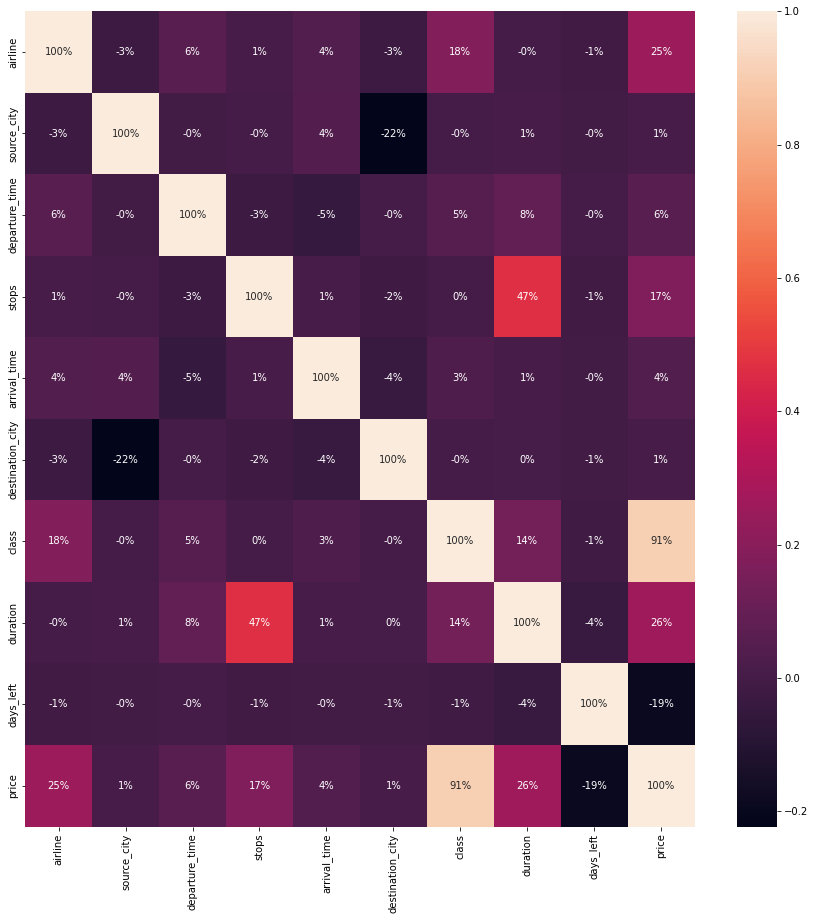

In [75]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".0%")

# Spliting Data

In [76]:
X=df.drop("price",axis=1)
y=df["price"]

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=987)

# Model Building


# LinearRegression

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lr=LinearRegression()

In [81]:
lr.fit(X_train,y_train)

LinearRegression()

In [82]:
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

In [83]:
from sklearn.metrics import r2_score,mean_squared_error

In [84]:
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y_train,y_pred_train)),2))
print("R2 Score:",round(r2_score(y_train,y_pred_train),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_pred_test)),2))
print("R2 Score:",round(r2_score(y_test,y_pred_test),2))

Train Data
RMSE: 0.35
R2 Score: 0.9
Test Data
RMSE: 0.35
R2 Score: 0.9


In [85]:
from sklearn.model_selection import cross_val_score
model_cv=cross_val_score(lr,X,y,cv=5)
model_cv

array([ 0.44868062,  0.44655593,  0.43131663,  0.90710316, -0.43132839])

In [86]:
df1.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,0,5,5,0,2.17,1,5953
1,4,2,1,0,4,5,0,2.33,1,5953
2,0,2,1,0,1,5,0,2.17,1,5956


# Decision Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
dt=DecisionTreeRegressor()

In [89]:
X1=df1.drop("price",axis=1)
y1=df1["price"]

In [90]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.20,random_state=987)

In [91]:
dt.fit(X1_train,y1_train)

DecisionTreeRegressor()

In [92]:
y_pred_train1=dt.predict(X1_train)
y_pred_test1=dt.predict(X1_test)

In [93]:
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y1_train,y_pred_train1)),2))
print("R2 Score:",round(r2_score(y1_train,y_pred_train1),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y1_test,y_pred_test1)),2))
print("R2 Score:",round(r2_score(y1_test,y_pred_test1),2))

Train Data
RMSE: 594.44
R2 Score: 1.0
Test Data
RMSE: 3453.58
R2 Score: 0.98


In [105]:
param_grid={
     "max_depth":np.arange(1,50),
     "min_samples_leaf":np.arange(1,50),
     "min_samples_split":np.arange(2,50,2),
}

In [106]:
from sklearn.model_selection import RandomizedSearchCV
rand_reg=RandomizedSearchCV(dt,param_distributions=param_grid,cv=5,scoring=mean_squared_error,n_jobs=-1)
rand_reg.fit(X1_train,y1_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48])},
                   scoring=<function mean_squared_error at 0x0000014B2BD39990>)

In [107]:
rand_reg.best_params_

{'min_samples_split': 28, 'min_samples_leaf': 30, 'max_depth': 45}

In [108]:
y_train_pred=rand_reg.predict(X1_train)
y_test_pred=rand_reg.predict(X1_test)

In [109]:
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y_train,y_train_pred)),2))
print("R2 Score:",round(r2_score(y_train,y_train_pred),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y_test,y_test_pred)),2))
print("R2 Score:",round(r2_score(y_test,y_test_pred),2))

Train Data
RMSE: 30703.75
R2 Score: -761354434.17
Test Data
RMSE: 30641.64
R2 Score: -758052851.35


# RandomForestRegressor

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
rt=RandomForestRegressor()

In [96]:
rt.fit(X1_train,y1_train)

RandomForestRegressor()

In [97]:
y_pred_train2=rt.predict(X1_train)
y_pred_test2=rt.predict(X1_test)

In [98]:
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y1_train,y_pred_train2)),2))
print("R2 Score:",round(r2_score(y1_train,y_pred_train2),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y1_test,y_pred_test2)),2))
print("R2 Score:",round(r2_score(y1_test,y_pred_test2),2))

Train Data
RMSE: 1136.44
R2 Score: 1.0
Test Data
RMSE: 2735.24
R2 Score: 0.99


# Hyper parameter tuning

In [100]:
param_grid={
     "max_depth":np.arange(1,20),
     "n_estimators":(50,100,150,200),
     "max_samples":[0.25,0.5,0.75],
     "max_features":[0.5,0.75]
}

In [101]:
from sklearn.model_selection import RandomizedSearchCV
rand_reg1=RandomizedSearchCV(rt,param_distributions=param_grid,cv=5,scoring=mean_squared_error,n_jobs=-1)
rand_reg1.fit(X1_train,y1_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': [0.5, 0.75],
                                        'max_samples': [0.25, 0.5, 0.75],
                                        'n_estimators': (50, 100, 150, 200)},
                   scoring=<function mean_squared_error at 0x0000014B2BD39990>)

In [102]:
rand_reg1.best_params_

{'n_estimators': 50, 'max_samples': 0.75, 'max_features': 0.5, 'max_depth': 5}

In [103]:
y_pred_train_rand=rand_reg1.predict(X1_train)
y_pred_test_rand=rand_reg1.predict(X1_test)

In [104]:
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y1_train,y_pred_train_rand)),2))
print("R2 Score:",round(r2_score(y1_train,y_pred_train_rand),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y1_test,y_pred_test_rand)),2))
print("R2 Score:",round(r2_score(y1_test,y_pred_test_rand),2))

Train Data
RMSE: 5503.55
R2 Score: 0.94
Test Data
RMSE: 5460.65
R2 Score: 0.94


# ADA BOOST REGRESSOR

In [162]:
from sklearn.ensemble import AdaBoostRegressor

In [163]:
ada=AdaBoostRegressor()

In [164]:
ada.fit(X1_train,y1_train)

AdaBoostRegressor()

In [165]:
y_pred_train6=ada.predict(X1_train)
y_pred_test6=ada.predict(X1_test)

In [166]:
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y1_train,y_pred_train6)),2))
print("R2 Score:",round(r2_score(y1_train,y_pred_train6),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y1_test,y_pred_test6)),2))
print("R2 Score:",round(r2_score(y1_test,y_pred_test6),2))

Train Data
RMSE: 5980.24
R2 Score: 0.93
Test Data
RMSE: 5962.09
R2 Score: 0.93


# HYPER PARAMETER TUNING

In [167]:
param_grid={'n_estimators':[20,50,70,100,120],
            'learning_rate':(0.1,0.01,0.001,1,),
             "loss":["linear", "square", "exponential"]}

In [170]:
from sklearn.model_selection import GridSearchCV
grid_clf=GridSearchCV(ada,param_grid=param_grid,cv=10,scoring=mean_squared_error,n_jobs=-1)
grid_clf.fit(X1_train,y1_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': (0.1, 0.01, 0.001, 1),
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [20, 50, 70, 100, 120]},
             scoring=<function mean_squared_error at 0x00000267851C3520>)

In [171]:
grid_clf.best_params_

{'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 20}

In [173]:
y_pred_train_grid=grid_clf.predict(X1_train)
y_pred_test_grid=grid_clf.predict(X1_test)

In [174]:
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y1_train,y_pred_train_grid)),2))
print("R2 Score:",round(r2_score(y1_train,y_pred_train_grid),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y1_test,y_pred_test_grid)),2))
print("R2 Score:",round(r2_score(y1_test,y_pred_test_grid),2))

Train Data
RMSE: 5804.57
R2 Score: 0.93
Test Data
RMSE: 5780.93
R2 Score: 0.93


# GradientBoostingRegressor

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

In [62]:
gb_reg=GradientBoostingRegressor()

In [63]:
gb_reg.fit(X1_train,y1_train)

GradientBoostingRegressor()

In [64]:
y_pred_train3=gb_reg.predict(X1_train)
y_pred_test3=gb_reg.predict(X1_test)

In [65]:
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y1_train,y_pred_train3)),2))
print("R2 Score:",round(r2_score(y1_train,y_pred_train3),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y1_test,y_pred_test3)),2))
print("R2 Score:",round(r2_score(y1_test,y_pred_test3),2))

Train Data
RMSE: 4956.09
R2 Score: 0.95
Test Data
RMSE: 4934.23
R2 Score: 0.95


# HYPER PARAMETER TUNING

In [67]:
param_grid={'n_estimators':[50,100,120,150],
            'learning_rate':(0.1,0.01,0.001)
           }

In [71]:
from sklearn.model_selection import GridSearchCV
grid_clf1=GridSearchCV(gb_reg,param_grid=param_grid,cv=10,scoring=mean_squared_error,n_jobs=-1)
grid_clf1.fit(X1_train,y1_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': (0.1, 0.01, 0.001),
                         'n_estimators': [50, 100, 120, 150]},
             scoring=<function mean_squared_error at 0x000002599906CCA0>)

In [72]:
grid_clf1.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

In [74]:
y_pred_train_grid1=grid_clf1.predict(X1_train)
y_pred_test_grid1=grid_clf1.predict(X1_test)

In [75]:
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y1_train,y_pred_train_grid1)),2))
print("R2 Score:",round(r2_score(y1_train,y_pred_train_grid1),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y1_test,y_pred_test_grid1)),2))
print("R2 Score:",round(r2_score(y1_test,y_pred_test_grid1),2))

Train Data
RMSE: 5170.12
R2 Score: 0.95
Test Data
RMSE: 5140.48
R2 Score: 0.95


# XGBOOST

In [34]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [35]:
import xgboost as xgb

In [36]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X1_train, y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [37]:
y_pred_train4=xgb_reg.predict(X1_train)
y_pred_test4=xgb_reg.predict(X1_test)

In [45]:
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y1_train,y_pred_train4)),2))
print("R2 Score:",round(r2_score(y1_train,y_pred_train4),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y1_test,y_pred_test4)),2))
print("R2 Score:",round(r2_score(y1_test,y_pred_test4),2))

Train Data
RMSE: 3426.53
R2 Score: 0.98
Test Data
RMSE: 3480.54
R2 Score: 0.98


# HYPER PARAMETER TUNING

In [48]:
param_grid={'n_estimators':[50,100,120,150],
            'learning_rate':[0.1,0.01,0.001],
            "gamma":np.arange(1,30)}

In [49]:
from sklearn.model_selection import GridSearchCV
grid_clf2=GridSearchCV(xgb_reg,param_grid=param_grid,cv=10,scoring=mean_squared_error,n_jobs=-1)
grid_clf2.fit(X1_train,y1_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=-1,
                                    grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012...
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0, ...),
             n_jobs=-1,
             param_grid={'gamma': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 120, 150]},
             scoring=<function mean_squared_error at 0x000001E45766E830>)

In [50]:
grid_clf2.best_params_

{'gamma': 1, 'learning_rate': 0.1, 'n_estimators': 50}

In [51]:
y_pred_train_grid2=grid_clf2.predict(X1_train)
y_pred_test_grid2=grid_clf2.predict(X1_test)

In [52]:
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y1_train,y_pred_train_grid2)),2))
print("R2 Score:",round(r2_score(y1_train,y_pred_train_grid2),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(y1_test,y_pred_test_grid2)),2))
print("R2 Score:",round(r2_score(y1_test,y_pred_test_grid2),2))

Train Data
RMSE: 4431.94
R2 Score: 0.96
Test Data
RMSE: 4419.87
R2 Score: 0.96


In [5]:
d={"Algorithm":["Linear Regression","DecisionTree Regressor","RandomForest Regressor","AdaBoost Regressor","GradientBoosting Regressor","XGBOOST Regressor"],"TRAIN_RMSE":[0.35,594.44,1136.44,5980.24,4956.09,3426.53],"TRAIN_R2":[0.90,1.0,1.0,0.93,0.95,0.98],"TEST_RMSE":[0.35,3448.83,2740.57,5962.09,4934.23,3480.54],"TEST_R2_SCORE":[0.9,0.98,0.99,0.93,0.95,0.98],"TRAIN_Regularized_RMSE":["-","-",0.94,0.93,0.95,0.96],"TRAIN_Regularized_R2_SCORE":["-","-",0.94,0.93,0.95,0.96],"TEST_Regularized_RMSE":["-","-",5460.65,5780.93,5140.48,4419.87],"TEST_Regularized_R2_SCORE":["-","-",0.94,0.93,0.95,0.96]}

In [6]:
Model=pd.DataFrame(d)

In [7]:
Model

,Algorithm,TRAIN_RMSE,TRAIN_R2,TEST_RMSE,TEST_R2_SCORE,TRAIN_Regularized_RMSE,TRAIN_Regularized_R2_SCORE,TEST_Regularized_RMSE,TEST_Regularized_R2_SCORE
0,Linear Regression,0.35,0.90,0.35,0.90,-,-,-,-
1,DecisionTree Regressor,594.44,1.00,3448.83,0.98,-,-,-,-
2,RandomForest Regressor,1136.44,1.00,2740.57,0.99,0.94,0.94,5460.65,0.94
3,AdaBoost Regressor,5980.24,0.93,5962.09,0.93,0.93,0.93,5780.93,0.93
4,GradientBoosting Regressor,4956.09,0.95,4934.23,0.95,0.95,0.95,5140.48,0.95
5,XGBOOST Regressor,3426.53,0.98,3480.54,0.98,0.96,0.96,4419.87,0.96


# Best Prediction Model is given by XGBOOST Regressor